###  Загрузка данных проекта в среду разработки

In [2]:
# Загружаем датасет, знакомимся.
import numpy as np
import pandas as pd
train = pd.read_csv('dataset/train.csv', index_col='id')
test = pd.read_csv('dataset/test.csv', index_col='id')
print(train)

       Marital status  Application mode  Application order  Course  \
id                                                                   
0                   1                 1                  1    9238   
1                   1                17                  1    9238   
2                   1                17                  2    9254   
3                   1                 1                  3    9500   
4                   1                 1                  2    9500   
...               ...               ...                ...     ...   
76513               1                17                  1    9254   
76514               1                 1                  6    9254   
76515               5                17                  1    9085   
76516               1                 1                  3    9070   
76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
id                          

###  Проверка датасета данных на пропуски

In [4]:
# Проверка на пропуски
train.isna().sum().sort_values(ascending=False)

Marital status                                    0
Age at enrollment                                 0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
International                                     0
Scholarship holder                                0
Application 

###  Проверка датасета данных на дубликаты

In [6]:
# Проверяем, есть ли дубликаты
train.duplicated().sum()

0

###  Взгляд на общую информацию по датасету

In [8]:
# смотрим общую инфу по датасету
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

###  Определяем категориальные и числовые признаки

In [10]:
# Пытаемся определить, сколько категориальных и числовых признаков у нас есть.
# Подобрал поиском и анализом примерную величину уникальных значений столбцов, которая позволяет провести эту границу
cat_cols = [col for col in train.columns if train[col].nunique() <= 19]

num_cols = [col for col in train.columns if train[col].nunique() >= 20]

# Извлекаем и выводим уникальные значения для каждого категориального признака
for col in cat_cols:
    unique_values = train[col].unique()
    print(f"Уникальные значения в столбце категориальных признаков'{col}': {unique_values}")
    
# Извлекаем и выводим уникальные значения для каждого категориального признака
for col in num_cols:
    unique_values = train[col].unique()
    print(f"Уникальные значения в столбце числовых признаков'{col}': {unique_values}")

Уникальные значения в столбце категориальных признаков'Marital status': [1 2 4 3 5 6]
Уникальные значения в столбце категориальных признаков'Application order': [1 2 3 6 4 5 0 9]
Уникальные значения в столбце категориальных признаков'Course': [9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130
 9556 9070   33  979   39]
Уникальные значения в столбце категориальных признаков'Daytime/evening attendance': [1 0]
Уникальные значения в столбце категориальных признаков'Nacionality': [  1  26  41  24   6 100  21  22  11 101   2 103 105  25  17  62 109  32]
Уникальные значения в столбце категориальных признаков'Displaced': [0 1]
Уникальные значения в столбце категориальных признаков'Educational special needs': [0 1]
Уникальные значения в столбце категориальных признаков'Debtor': [0 1]
Уникальные значения в столбце категориальных признаков'Tuition fees up to date': [1 0]
Уникальные значения в столбце категориальных признаков'Gender': [0 1]
Уникальные значения в столбце категор

###  Определяем категориальные и числовые признаки 2
Количество уникальных значений не оказалось тем показателем, который бы указывал однозначено на то, категориальный ли это признак или числовой.
Семантика тоже оказалась немаловажным признаком. Поэтому определили так:

In [16]:
import pandas as pd

# Категориальные признаки
categorical_columns = [
    "Marital status", "Application mode", "Application order", "Course",
    "Daytime/evening attendance", "Previous qualification", "Nacionality",
    "Mother's qualification", "Father's qualification", "Mother's occupation",
    "Father's occupation", "Displaced", "Educational special needs", "Debtor",
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]
# числовые признаки
numerical_columns = [
    "Previous qualification (grade)", "Admission grade", "Age at enrollment",
    "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate", "Inflation rate", "GDP"
]


print("Categorical Columns:")
for column in categorical_columns:
    print(column)

print("\n")

print("Numerical Columns:")
for column in numerical_columns:
    print(column)


Categorical Columns:
Marital status
Application mode
Application order
Course
Daytime/evening attendance
Previous qualification
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
International


Numerical Columns:
Previous qualification (grade)
Admission grade
Age at enrollment
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP


###  Кодировка Target c использованием LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder

# Используем LabelEncoder для кодирования уникальных значений
le = LabelEncoder()
train['Target'] = le.fit_transform(train['Target'])

# Находим уникальные значения и сортируем их по порядку
unique_values = sorted(zip(le.transform(le.classes_), le.classes_))

# Проверяем результат
print("Преобразованные значения 'Target':", train['Target'].unique())


Преобразованные значения 'Target': [2 0 1]


###  Применяем нормализацию к новому определенному списку числовых категорий numerical_columns

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Применяем нормализацию
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])

# Проверяем результат
print(train.head())


    Marital status  Application mode  Application order  Course  \
id                                                                
0                1                 1                  1    9238   
1                1                17                  1    9238   
2                1                17                  2    9254   
3                1                 1                  3    9500   
4                1                 1                  2    9500   

    Daytime/evening attendance  Previous qualification  \
id                                                       
0                            1                       1   
1                            1                       1   
2                            1                       1   
3                            1                       1   
4                            1                       1   

    Previous qualification (grade)  Nacionality  Mother's qualification  \
id                                              

###  Feature engeneering. Два новых признака пока достаточно, это средняя величина зачтенных экзаменов за два семестра и отношение количества успешно завершенных курсов к общему количеству записанных курсов за оба семестра.

In [26]:
train["Curricular units approved_ratio"] = (
    (train["Curricular units 1st sem (approved)"]) + (train["Curricular units 2nd sem (approved)"] )
) / 2

train['Academic Performance Ratio'] = np.where(
    (train['Curricular units 1st sem (enrolled)'] + train['Curricular units 2nd sem (enrolled)']) == 0,
    0,  # Если знаменатель равен 0, устанавливаем значение 0
    (train['Curricular units 1st sem (approved)'] + train['Curricular units 2nd sem (approved)']) /
    (train['Curricular units 1st sem (enrolled)'] + train['Curricular units 2nd sem (enrolled)'])
)

# Проверяем добавленные признаки
print(train[["Curricular units approved_ratio", "Academic Performance Ratio"]].head(20))

    Curricular units approved_ratio  Academic Performance Ratio
id                                                             
0                          0.265385                    1.079592
1                          0.076923                    0.312925
2                          0.000000                    0.000000
3                          0.309615                    1.003523
4                          0.265385                    0.925364
5                          0.000000                    0.000000
6                          0.201923                    0.985714
7                          0.246154                    1.001361
8                          0.000000                    0.000000
9                          0.265385                    0.925364
10                         0.000000                    0.000000
11                         0.000000                    0.000000
12                         0.196154                    0.797959
13                         0.132692     

###  Применив RandomForestClassifier определяем часть важных признаков: как показал анализ, 20 признаков охватывают 90% от общей суммы "важности". Топ-15 давало, к примеру, 83%

Top 20 features based on importance:
                                   Feature  Importance
37              Academic Performance Ratio    0.139096
36         Curricular units approved_ratio    0.109038
30     Curricular units 2nd sem (approved)    0.096230
31        Curricular units 2nd sem (grade)    0.080654
25        Curricular units 1st sem (grade)    0.069500
24     Curricular units 1st sem (approved)    0.069471
12                         Admission grade    0.038465
29  Curricular units 2nd sem (evaluations)    0.036522
6           Previous qualification (grade)    0.031889
23  Curricular units 1st sem (evaluations)    0.031124
19                       Age at enrollment    0.027376
16                 Tuition fees up to date    0.023498
11                     Father's occupation    0.023074
3                                   Course    0.020566
10                     Mother's occupation    0.018397
33                       Unemployment rate    0.016952
35                          

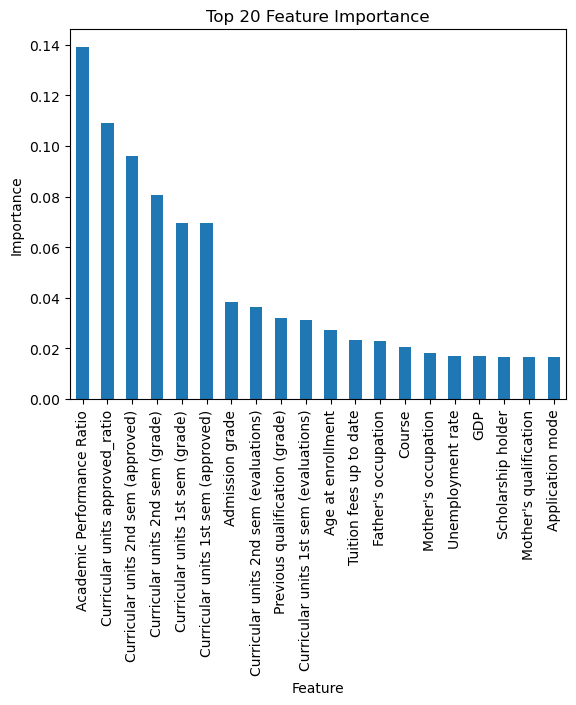

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


#train = pd.read_csv('train.csv', index_col='id')

# Target' — это целевая переменная
X = train.drop('Target', axis=1)  # Все столбцы, кроме целевой переменной
y = train['Target']  # Целевая переменная

# Обучаем модель случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Получаем важность признаков
feature_importances = model.feature_importances_

# Создаем DataFrame для визуализации
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Сортируем признаки по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Получаем топ-20 признаков
top_20_features = importance_df.head(20)

# Выводим топ-20 признаков
print("Top 20 features based on importance:")
print(top_20_features)

# Подсчитываем сумму важности топ-20 признаков
total_importance_top_20 = top_20_features['Importance'].sum()
print(f"\nСумма важности топ-20 признаков: {total_importance_top_20}")

# Визуализируем важность признаков
top_20_features.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 20 Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [30]:
import numpy as np

# Линейная регрессия
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

# Логистическая регрессия
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

    def precision(self, y_true, y_pred):
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        return tp / (tp + fp) if (tp + fp) > 0 else 0

    def recall(self, y_true, y_pred):
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        return tp / (tp + fn) if (tp + fn) > 0 else 0

    def f1_score(self, y_true, y_pred):
        precision = self.precision(y_true, y_pred)
        recall = self.recall(y_true, y_pred)
        return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [31]:
# Логистическая регрессия для множества классов
class LogisticRegressionMultiClass:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Числовая стабильность
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        # One-hot encoding меток
        y_one_hot = np.zeros((n_samples, n_classes))
        y_one_hot[np.arange(n_samples), y] = 1

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._softmax(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y_one_hot))
            db = (1 / n_samples) * np.sum(y_predicted - y_one_hot, axis=0)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._softmax(linear_model)
        return np.argmax(y_predicted, axis=1)


In [32]:
# Использование LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Нормализация данных
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Инициализация модели
lr = LinearRegression(learning_rate=0.01, n_iterations=10000)

# Обучение
lr.fit(X_train, y_train)

# Предсказание
predictions = lr.predict(X_test)

# Вычисление метрики
mse = lr.mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 2192.635817765761


In [38]:
#Визуализация LinearRegression
import matplotlib.pyplot as plt

    
def plot(self, X, y, feature_index=0):
    #График истинных значений и предсказаний.
    y_pred = self.predict(X)
    plt.scatter(X[:, feature_index], y, color="blue", label="Истинные значения")
    plt.scatter(X[:, feature_index], y_pred, color="red", alpha=0.5, label="Предсказания")
    plt.xlabel(f"Признак {feature_index}")

    plt.ylabel("Целевая переменная Y")
    plt.title("Линейная регрессия: истинные значения vs предсказания")
    plt.legend()
    plt.show()

plot(X_test, y_test, feature_index=0)

TypeError: plot() missing 1 required positional argument: 'y'

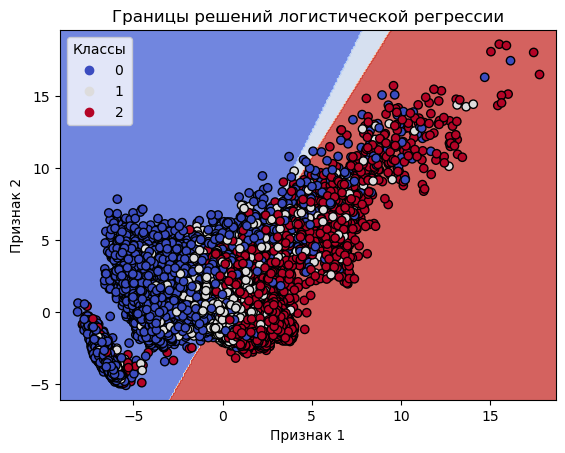

In [37]:
#Визуализация LogisticRegressionMultiClass
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Функция для построения границ решений
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid)
    predictions = predictions.reshape(xx.shape)

    plt.contourf(xx, yy, predictions, alpha=0.8, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.legend(*scatter.legend_elements(), title="Классы")
    plt.title("Границы решений логистической регрессии")
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")
    plt.show()

# Уменьшение размерности данных
pca = PCA(n_components=2)  # Оставляем 2 компоненты
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучение модели на уменьшенных данных
log_reg_multi = LogisticRegressionMultiClass(learning_rate=0.001, n_iterations=5000)
log_reg_multi.fit(X_train_pca, y_train)

# Визуализация
plot_decision_boundaries(X_train_pca, y_train, log_reg_multi)